In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

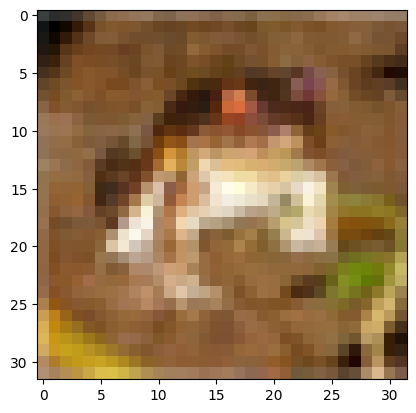

In [8]:
plt.imshow(x_train[0]) 
plt.show()

In [10]:
x_train = x_train.astype(float) / 255
x_test = x_test.astype(float)/255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train,epochs=5,batch_size=32,verbose=1)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 61ms/step - accuracy: 0.4151 - loss: 1.6103
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 0.6295 - loss: 1.0550
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 76ms/step - accuracy: 0.6958 - loss: 0.8761
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 65ms/step - accuracy: 0.7509 - loss: 0.7220
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 74ms/step - accuracy: 0.7919 - loss: 0.6029


In [17]:
loss,accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.7047 - loss: 0.9077
Test accuracy: 69.74%


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,836,128 (7.00 MB)

 Trainable params: 612,042 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,224,086 (4.67 MB)

In [19]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


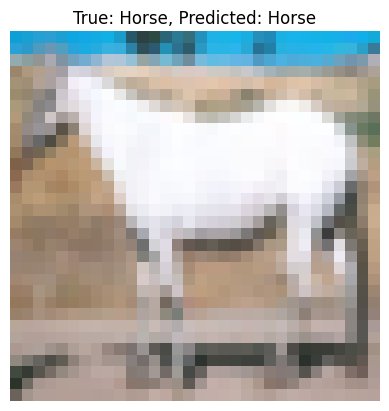

In [21]:
import numpy as np
# Pick a random image from the test set
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]
true_label = y_test[random_index]

# Predict the class of the random image
prediction = model.predict(np.expand_dims(random_image, axis=0))
predicted_class = np.argmax(prediction)

# Display the random image and prediction
plt.imshow(random_image)
plt.title(f"True: {class_names[np.argmax(true_label)]}, Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()